In [13]:
from scipy import constants as const
import pandas as pd
import plot_functions as p_func
import numpy as np
from scipy.optimize import curve_fit

In [14]:
## latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [15]:
c_scheme = p_func.c_scheme_02()

In [16]:
def volt_N(V_input):
    vmax = 0.3135176
    n0 = 8535254.64629534

    n = n0 * V_input / vmax

    return n

In [17]:
fname1 = "data_lifetime/scope_8.csv"
csv_data_1 = pd.read_csv(fname1, sep=",")

time1 = csv_data_1["second"] + 0.9
volt1 = volt_N(csv_data_1["Volt4"] / 10)

fname2 = "data_lifetime/scope_9.csv"
csv_data_2 = pd.read_csv(fname2, sep=",")

time2 = csv_data_2["second"] + 0.9
volt2 = volt_N(csv_data_2["Volt4"] / 10)

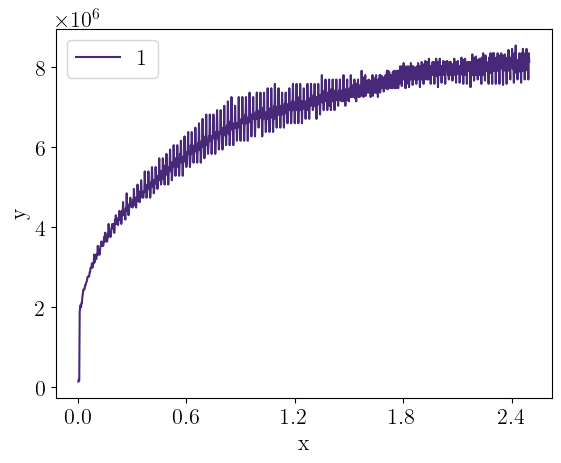

In [18]:
von1, zu1 = 641, -360

data_to_range = [
    [time1[von1:zu1], volt1[von1:zu1], "1", c_scheme[1], "-", ""],
]

p_func.plot_with_one_axis(data_to_range, name_x='x', name_y='y', plot_title='', filename_to_save='nosvg', marker_size='5', font_size=16, offset_text_size=16, legend_local='best', legend_size=16, x_ticks_limit=5, x_ticks_numstyle='sci', line_width=1.5, y_lim=None)

In [19]:
# fit function

def fit_func(t, N0, yoffset, tau):
    return N0 * (1 - np.exp(-(t) / tau)) + yoffset

t_fit = np.linspace(time1[von1:zu1].min(), time1[von1:zu1].max(), 100)
guess = [8e6, 0, 0.2]
popt, pcov = curve_fit(fit_func, time1[von1:zu1], volt1[von1:zu1], p0=guess)
y_fit = fit_func(t_fit, *popt)
y_guess = fit_func(t_fit, *guess)

In [20]:
print("Fit parameters:")
print("N0      =", popt[0])
print("yoffset =", popt[1])
print("tau     =", popt[2])

Fit parameters:
N0      = 5756861.208275176
yoffset = 2359272.1194699896
tau     = 0.6670612204030475


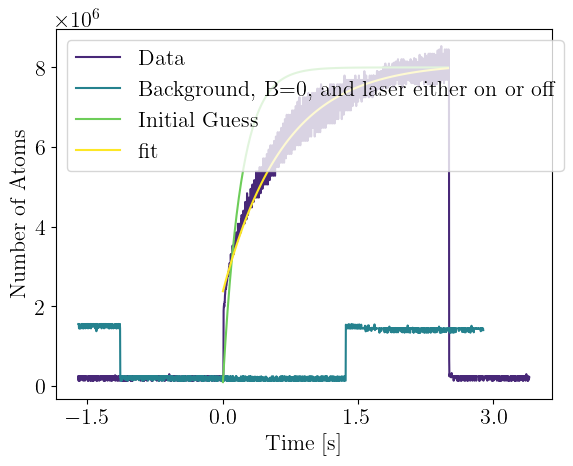

In [23]:
data_to_plot = [
    [time1, volt1, "Data", c_scheme[1], "-", ""],
    [time2, volt2, "Background, B=0, and laser either on or off", c_scheme[4], "-", ""],

    [t_fit, y_guess, "Initial Guess", c_scheme[7], "-", ""],
    [t_fit, y_fit, "fit", c_scheme[9], "-", ""],
]

p_func.plot_with_one_axis(data_to_plot, name_x='Time [s]', name_y='Number of Atoms', plot_title='', filename_to_save='nosvg', marker_size='5', font_size=16, offset_text_size=16, legend_local='upper left', legend_size=16, x_ticks_limit=5, x_ticks_numstyle='sci', line_width=1.5, y_lim=None)

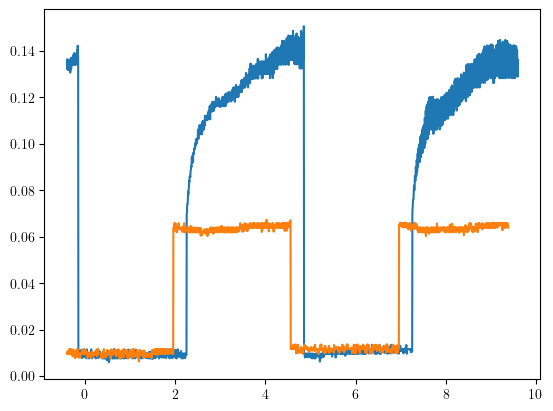

In [22]:
fname3 = "data_lifetime/scope_17.csv"
csv_data_3 = pd.read_csv(fname3, sep=",")

time3 = csv_data_3["second"]
volt3 = csv_data_3["Volt4"]

# volt3 = volt_N(csv_data_3["Volt4"] / 10)

fname4 = "data_lifetime/scope_18.csv"
csv_data_4 = pd.read_csv(fname4, sep=",")

time4 = csv_data_4["second"]
volt4 = csv_data_4["Volt4"]

plt.plot(time3, volt3)
plt.plot(time4, volt4)